# Práctica 4: Modelado de Datos - Regresión

1. Cargas librerias
2. Leer/seleccioar/renombrar datos
3. Limpieza de Datos
4. Transformacion de Datos
5. Correlacion
6. Partición del conjunto de datos
7. Entrenamiento y predicción
8. Predecir nuevos registros

## 1. Cargar librerias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing #para la limpieza
from sklearn.preprocessing import LabelEncoder #Para la renovacion
from sklearn import linear_model #para la regresion lineal
from sklearn.neural_network import MLPRegressor #Para la red neuronal
from sklearn.model_selection import train_test_split #Para particionar el conjunto de datos

## 2. Leer/seleccionar/renombrar datos

In [4]:
#Leer Datos
df = pd.read_csv('surveys.csv')
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [11]:
# Seleccion de datos
df = df[['species_id','sex','hindfoot_length','weight']]
# Renombre de Datos
df.columns = ['especie','sexo','tamaño_pata','peso']
df.head()


,especie,sexo,tamaño_pata,peso
0,NL,M,32.0,NaN
1,NL,M,33.0,NaN
2,DM,F,37.0,NaN
3,DM,M,36.0,NaN
4,DM,M,35.0,NaN


## 3. Limpieza de Datos

In [12]:
df.isnull().sum()

especie         763
sexo           2511
tamaño_pata    4111
peso           3266
dtype: int64

In [13]:
df.shape

(35549, 4)

In [14]:
df.dtypes

especie         object
sexo            object
tamaño_pata    float64
peso           float64
dtype: object

# 3.1 Reemplazar valores perdidos con moda

In [16]:
PromTamPata = df['tamaño_pata'].mean()

PromPeso = df['peso'].mean()

df['tamaño_pata'] =  df['tamaño_pata'].replace(np.nan, PromTamPata)

df['peso'] = df['peso'].replace(np.nan, PromPeso)
df.head()

,especie,sexo,tamaño_pata,peso
0,NL,M,32.0,42.672428
1,NL,M,33.0,42.672428
2,DM,F,37.0,42.672428
3,DM,M,36.0,42.672428
4,DM,M,35.0,42.672428


## 3.2 Reemplazar valores perdidos con moda

In [19]:
ModaSexo = df['sexo'].mode()
print(ModaSexo)

ModaEspecie = df['especie'].mode()
print(ModaEspecie)

0    M
Name: sexo, dtype: object
0    DM
Name: especie, dtype: object


In [20]:
df['sexo'] = df['sexo'].fillna('M')

df['especie'] = df['especie'].fillna('DM')

df.head()

,especie,sexo,tamaño_pata,peso
0,NL,M,32.0,42.672428
1,NL,M,33.0,42.672428
2,DM,F,37.0,42.672428
3,DM,M,36.0,42.672428
4,DM,M,35.0,42.672428


# 4. Transformación de Datos

In [22]:

encoder = preprocessing.LabelEncoder()
encoder.fit(df['sexo'])

df['sexo'] = encoder.transform(df['sexo'])
encoder.fit(df['especie'])

df['especie'] = encoder.transform(df['especie'])
df.head()


,especie,sexo,tamaño_pata,peso
0,15,1,32.0,42.672428
1,15,1,33.0,42.672428
2,11,0,37.0,42.672428
3,11,1,36.0,42.672428
4,11,1,35.0,42.672428


# 5. Correlacion

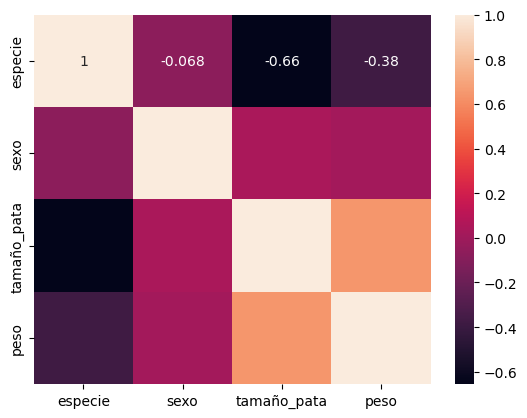

In [26]:
# Calcular matriz de correlación
corre_mat = df.corr()

#Graficar matriz de correlacion
sns.heatmap(corre_mat, annot = True)
plt.show()